Import necessary packages

In [2]:
import numpy as np
import pandas as pd
#load csv datasets


train_dt = pd.read_csv(r"Alzheimers_Detection_dataset\CSV_datafiles\_train_classes.csv")
test_dt = pd.read_csv(r"Alzheimers_Detection_dataset\CSV_datafiles\_test_classes.csv")
valid_dt = pd.read_csv(r"Alzheimers_Detection_dataset\CSV_datafiles\_valid_classes.csv")

VMD - VERY MILD DEMENTIA
ND - NO DEMENTIA
MoD - MODERATE DEMENTIA
MD - MILD DEMENTIA

**Feature Engineer a new feature, called DEMENTIA TYPE (DMT)**

In [3]:
test_dt["DMT"] = test_dt["filename"].apply(lambda x : x.split("__")[0])
train_dt["DMT"] = train_dt["filename"].apply(lambda x : x.split("__")[0])
valid_dt["DMT"] = valid_dt["filename"].apply(lambda x : x.split("__")[0])


test_dt

,filename,MD,MoD,ND,VMD,DMT
0,VMD__214_jpg.rf.e1b1f4a83fae251bbd6503a616ec46...,0,0,0,1,VMD
1,VMD__2151_jpg.rf.8b876db2d2f50c8a1b906e7b4f59b...,0,0,0,1,VMD
2,VMD__571_jpg.rf.51f59867065fd7c1524968d884fecc...,0,0,0,1,VMD
3,VMD__1040_jpg.rf.cc53e93f747ec4c4cf3b0406ae952...,0,0,0,1,VMD
4,VMD__617_jpg.rf.f5c8c181836d07d5062533f818b74f...,0,0,0,1,VMD
...,...,...,...,...,...,...
635,ND__800_jpg.rf.dcc3a091f8f057b341bf6411c9f709a...,0,0,1,0,ND
636,ND__81_jpg.rf.7c09795e85b8d4e7a387e6b7fd37ba00...,0,0,1,0,ND
637,ND__773_jpg.rf.19ac4f722679e56189a1fb7d5deed94...,0,0,1,0,ND
638,ND__787_jpg.rf.f6bdcf6c528e29e353091678cb0d361...,0,0,1,0,ND


In [4]:
train_dt

,filename,MD,MoD,ND,VMD,DMT
0,ND__2350_jpg.rf.f80ac7f889639a124e46a6161c6ead...,0,0,1,0,ND
1,ND__2410_jpg.rf.6187777801c05a159fb8b3fbfb803f...,0,0,1,0,ND
2,VMD__1300_jpg.rf.4d7c333b0db31734bc8aab97e1ceb...,0,0,0,1,VMD
3,VMD__1315_jpg.rf.71636662b292c60ca022a1efbc8f5...,0,0,0,1,VMD
4,ND__2408_jpg.rf.53fc1d9575791ead9974991dd8cbc4...,0,0,1,0,ND
...,...,...,...,...,...,...
8955,ND__1906_jpg.rf.f1feb6ec323f9b4a2088bf6367c2e9...,0,0,1,0,ND
8956,ND__138_jpg.rf.d7491b71fdcdd8634f9c6bf0343d0bd...,0,0,1,0,ND
8957,ND__300_jpg.rf.aa5cbad17ef8ad2959b43079e045a62...,0,0,1,0,ND
8958,ND__1883_jpg.rf.1239b5c89a114b2396318b01fc7e90...,0,0,1,0,ND


Removing redundant features in dts

In [5]:
def RemoveFeatures(data):
    columns = data.columns.values[1:5]
    data.drop(columns, axis  = 1, inplace = True)
    return data

test_dt = RemoveFeatures(test_dt).sort_values(by= "filename", ascending= False)
train_dt = RemoveFeatures(train_dt).sort_values(by= "filename")
valid_dt = RemoveFeatures(valid_dt).sort_values(by= "filename")

SORT DATASETS

In [6]:
def SORT(data):
    data["ID"] = data["filename"].apply(lambda x: x.split("__")[1].split("_")[0]).astype("int")
    MD = data[data["DMT"] == "MD"].sort_values(by = "ID")
    ND = data[data["DMT"] == "ND"].sort_values(by = "ID")
    VMD = data[data["DMT"] == "VMD"].sort_values(by = "ID")
    MoD = data[data["DMT"] == "MoD"].sort_values(by = "ID")

    return pd.concat([MD,MoD, ND, VMD]).reset_index().drop(["index", "ID"], axis= 1)
  

#sorted datasets
Train = SORT(train_dt)
Test = SORT(test_dt)
Valid = SORT(valid_dt)

In [7]:
Test

,filename,DMT
0,MD__9_jpg.rf.f8f4ac7f7a51aa6919da2bad79caa23e.jpg,MD
1,MD__11_jpg.rf.c9ec6979e598b0321b82e341df9c38c3...,MD
2,MD__45_jpg.rf.668ade5c9bb4ce92f91724c309a7b54d...,MD
3,MD__49_jpg.rf.82897f4a760dbe87faafeaf3740d6af3...,MD
4,MD__66_jpg.rf.ee9cb31cf96e8b620872efac81f9cd1a...,MD
...,...,...
635,VMD__2210_jpg.rf.f22c94164940f4ce71615be6f8e41...,VMD
636,VMD__2211_jpg.rf.beb3748977ed5d91363a52a6c2130...,VMD
637,VMD__2219_jpg.rf.19a652c87bed7a9e27492c9101535...,VMD
638,VMD__2223_jpg.rf.014d95275349e928ab2c962a8bf59...,VMD


**IMAGE PRE-PROCESSING**

In [8]:
"""
import os

folder_path = r"Alzheimers_Detection_dataset\test"  # change this to your folder
file_list = os.listdir(folder_path)

#sort files 
file_list.sort()

for idx, filename in enumerate(file_list):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        old_path = os.path.join(folder_path, filename)
        new_filename = f"image_{idx}.jpg"  # or .png depending on your needs
        new_path = os.path.join(folder_path, new_filename)
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_filename}")
   
"""

'\nimport os\n\nfolder_path = r"Alzheimers_Detection_dataset\test"  # change this to your folder\nfile_list = os.listdir(folder_path)\n\n#sort files \nfile_list.sort()\n\nfor idx, filename in enumerate(file_list):\n    if filename.lower().endswith((".jpg", ".jpeg", ".png")):\n        old_path = os.path.join(folder_path, filename)\n        new_filename = f"image_{idx}.jpg"  # or .png depending on your needs\n        new_path = os.path.join(folder_path, new_filename)\n        os.rename(old_path, new_path)\n        print(f"Renamed: {filename} -> {new_filename}")\n   \n'

In [9]:
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


#Test

Images1 = []
size1 = len(Test)
  
for key in range(size1):
    img = load_img(rf"Alzheimers_Detection_dataset/test/image_{key}.jpg").convert("RGB")
    img_resized = img.resize((128, 128), Image.Resampling.LANCZOS)
    img_array = img_to_array(img_resized).astype(np.uint8)
    Images1.append(img_array)

Test_img = pd.DataFrame({"Images":Images1})
    
  
#Train
Images2 = []
size2 = len(Train)
  
for key in range(size2):
    img = load_img(rf"Alzheimers_Detection_dataset/train/image_{key}.jpg").convert("RGB")
    img_resized = img.resize((128, 128), Image.Resampling.LANCZOS)
    img_array = img_to_array(img_resized).astype(np.uint8)
    Images2.append(img_array)

Train_img = pd.DataFrame({"Images":Images2})


#valid
Images3 = []
size3 = len(Valid)
  
for key in range(size3):
    img = load_img(rf"Alzheimers_Detection_dataset/valid/image_{key}.jpg").convert("RGB")
    img_resized = img.resize((128, 128), Image.Resampling.LANCZOS)
    img_array = img_to_array(img_resized).astype(np.uint8)
    Images3.append(img_array)

Valid_img = pd.DataFrame({"Images":Images3})
"""
#processed training, testing, and validating datasets
Train_img = IMGProcessing("train")
Train_img"""

Train_img.shape

(8960, 1)

In [18]:
Train_img["Images"]

0       [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1       [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
2       [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
3       [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
4       [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
                              ...                        
8955    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
8956    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
8957    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
8958    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
8959    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: Images, Length: 8960, dtype: object

In [11]:
#preprocessing
import numpy as np

Train_img_scaled = np.stack(Train_img["Images"].values).astype(np.float32) / 255.0
Test_img_scaled = np.stack(Test_img["Images"].values).astype(np.float32) / 255.0
Valid_img_scaled = np.stack(Valid_img["Images"].values).astype(np.float32) / 255.0

Test_img_scaled

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

**Training datas = Train_img, train_dt["DMT"]**

**Validation datas = Valid_img, valid_dt["DMT"]**

**Testing datas = Test_img, test_dt["DMT"]**

In [12]:
#ENCODING DMT
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_DMT = encoder.fit_transform(Train["DMT"])
valid_DMT = encoder.fit_transform(Valid["DMT"])
test_DMT = encoder.fit_transform(Test["DMT"])

encoder.classes_

array(['MD', 'MoD', 'ND', 'VMD'], dtype=object)

CNN ARCHITECTURE

In [13]:
"""
#Pre-Trained Models
import tensorflow_hub as hub
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
base_model = Sequential([
    hub.KerasLayer(model_url, trainable=False)
])
"""

'\n#Pre-Trained Models\nimport tensorflow_hub as hub\nmodel_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"\nbase_model = Sequential([\n    hub.KerasLayer(model_url, trainable=False)\n])\n'

In [14]:
#without regularization
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, tanh, sigmoid, softmax
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Flatten, Dense, InputLayer, Conv2D, MaxPool2D

model = Sequential([
    #input
    InputLayer(shape= (128,128,3)),


    #CONVOLUTION LAYER
    Conv2D(filters = 32, kernel_size = (3,3), activation = relu, padding = "same"),
    MaxPool2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), activation = relu),
    MaxPool2D((2,2)),

    Conv2D(filters = 128, kernel_size= (3,3), activation= relu),
    MaxPool2D((2,2)),

    #flatten
    Flatten(),

    #hidden layer
    Dense(units= 128, activation= relu),

    #output
    Dense(units= 4, activation= softmax)
    


])

Compile

In [15]:
model.compile(optimizer= Adam(learning_rate= 0.0001), loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])

In [16]:
Valid_img["Images"].iloc[0].dtype

dtype('uint8')

Model Training

In [17]:
#train model
History = model.fit(x= Train_img_scaled, y= train_DMT, validation_data= (Valid_img_scaled, valid_DMT), epochs= 15)

Epoch 1/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 79s 261ms/step - accuracy: 0.4962 - loss: 1.0422 - val_accuracy: 0.5641 - val_loss: 0.8995
Epoch 2/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 74s 263ms/step - accuracy: 0.5681 - loss: 0.9086 - val_accuracy: 0.6250 - val_loss: 0.8297
Epoch 3/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 74s 264ms/step - accuracy: 0.6137 - loss: 0.8471 - val_accuracy: 0.6609 - val_loss: 0.7894
Epoch 4/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 78s 277ms/step - accuracy: 0.6228 - loss: 0.8240 - val_accuracy: 0.7086 - val_loss: 0.7386
Epoch 5/15
280/280 ━━━━━━━━━━━━━━━━━━━━ 81s 289ms/step - accuracy: 0.6599 - loss: 0.7629 - val_accuracy: 0.7422 - val_loss: 0.6782
Epoch 6/15
137/280 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - accuracy: 0.6777 - loss: 0.7361

KeyboardInterrupt: 

Model Evaluation

In [ ]:
#evaluate model on training set
model.evaluate(Train_img_scaled, train_DMT)

280/280 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - accuracy: 0.9545 - loss: 0.1704


[0.19461099803447723, 0.9464285969734192]

Losses trend per epoch

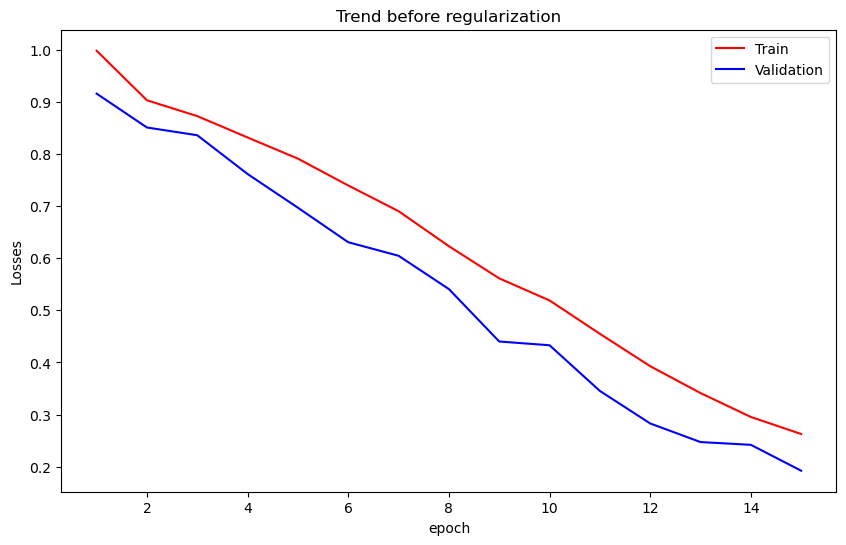

In [ ]:
train_loss = History.history["loss"]
val_loss = History.history["val_loss"]
epoch = np.arange(15)+1

plt.figure(figsize = (10,6))
plt.plot(epoch, train_loss, "r", label = "Train")
plt.plot(epoch, val_loss, "b", label = "Validation")
plt.xlabel("epoch")
plt.ylabel("Losses")
plt.title("Trend before regularization")
plt.legend()

Model Prediction

In [ ]:
#predict
pred = model.predict(Test_img_scaled)

from aargmax import Argmax
argmax = Argmax(pred)
argmax.get_arg()
pred_max = argmax.print_list()

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step


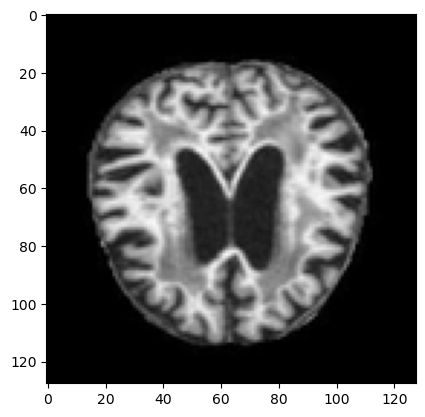

In [ ]:
plt.imshow(Test_img_scaled[1])

In [ ]:
test_DMT

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
#evaluate model on validation set
model.evaluate(Valid_img_scaled, valid_DMT)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9580 - loss: 0.1546


[0.19233427941799164, 0.9429687261581421]

In [ ]:
#get metrics
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score

print(confusion_matrix(test_DMT, pred_max))

print("\n\n")

print(classification_report(test_DMT, pred_max))

#print F2 score
print(f"f2_score = {fbeta_score(test_DMT, pred_max, beta= 0.5, average = 'macro')}")

[[ 81   0   1   2]
 [  0   5   0   0]
 [  1   0 308  11]
 [  8   0  22 201]]



              precision    recall  f1-score   support

           0       0.90      0.96      0.93        84
           1       1.00      1.00      1.00         5
           2       0.93      0.96      0.95       320
           3       0.94      0.87      0.90       231

    accuracy                           0.93       640
   macro avg       0.94      0.95      0.95       640
weighted avg       0.93      0.93      0.93       640

f2_score = 0.9433662097522149


RESULT & DISCUSSION:
With the CNN model( accuracy  = 94%), the Alzhemier MRI scan was classified and annotated.

In [ ]:
"""
model.save("MRI_SCAN_CLASSIFIER.h5")
"""

'\nmodel.save("MRI_SCAN_CLASSIFIER.h5")\n'